In [ ]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 29.3 MB/s eta 0:00:00


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings

In [ ]:
sns.set(style="darkgrid")
df = pd.read_csv('/content/poizd_dataset.csv')
display(df)

,Date,All cargoes,Coal,Iron ore,Mineral and construction cargoes,Black metal,Oil and petroleum products,Oil and dark petroleum products,Light petroleum products,Chemical and mineral fertilizers,Drug,Chemical cargo,Cereal crops,Forest cargoes,Cement
0,2003-01-01 00:00:00,111.300000,107.400000,110.900000,104.2,110.0,127.0,-,-,107.0,107.000000,107.000000,106.100000,106.900000,105.000000
1,2004-01-01 00:00:00,112.000000,110.600000,122.600000,105.2,110.8,128.0,-,-,108.0,122.500000,109.000000,109.600000,109.000000,107.500000
2,2005-01-01 00:00:00,139.300000,128.200000,127.200000,106.2,150.9,129.0,-,-,109.0,130.000000,148.900000,137.700000,148.900000,147.100000
3,2006-01-01 00:00:00,107.400000,103.000000,104.200000,107.2,109.1,130.0,-,-,110.0,100.900000,109.100000,112.000000,109.100000,109.100000
4,2007-01-01 00:00:00,109.300000,109.800000,109.900000,108.2,109.9,131.0,-,-,111.0,109.900000,109.800000,109.800000,109.900000,109.800000
5,2008-01-01 00:00:00,149.000000,143.100000,148.900000,109.2,148.5,132.0,-,-,112.0,149.900000,149.400000,151.100000,149.400000,156.200000
6,2009-01-01 00:00:00,113.500000,120.300000,105.200000,110.2,111.1,133.0,-,-,113.0,111.400000,116.500000,112.400000,119.200000,116.500000
7,2010-01-01 00:00:00,102.200000,101.300000,104.700000,111.2,104.8,134.0,-,-,114.0,105.500000,100.200000,99.000000,100.900000,100.200000
8,2011-01-01 00:00:00,113.300000,112.900000,114.600000,112.2,114.7,135.0,113.1,113.0,115.0,114.400000,113.000000,108.400000,113.100000,112.900000
9,2012-01-01 00:00:00,109.800000,110.000000,110.000000,113.2,110.0,136.0,109.9,110.0,116.0,109.900000,109.900000,106.600000,109.900000,110.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              20 non-null     object 
 1   All cargoes                       20 non-null     float64
 2   Coal                              20 non-null     float64
 3   Iron ore                          20 non-null     float64
 4   Mineral and construction cargoes  20 non-null     float64
 5   Black metal                       20 non-null     float64
 6   Oil and petroleum products        20 non-null     float64
 7   Oil and dark petroleum products   20 non-null     object 
 8   Light petroleum products          20 non-null     object 
 9   Chemical and mineral fertilizers  20 non-null     float64
 10  Drug                              20 non-null     float64
 11  Chemical cargo                    20 non-null     float64
 12  Cereal cro

AttributeError: ignored

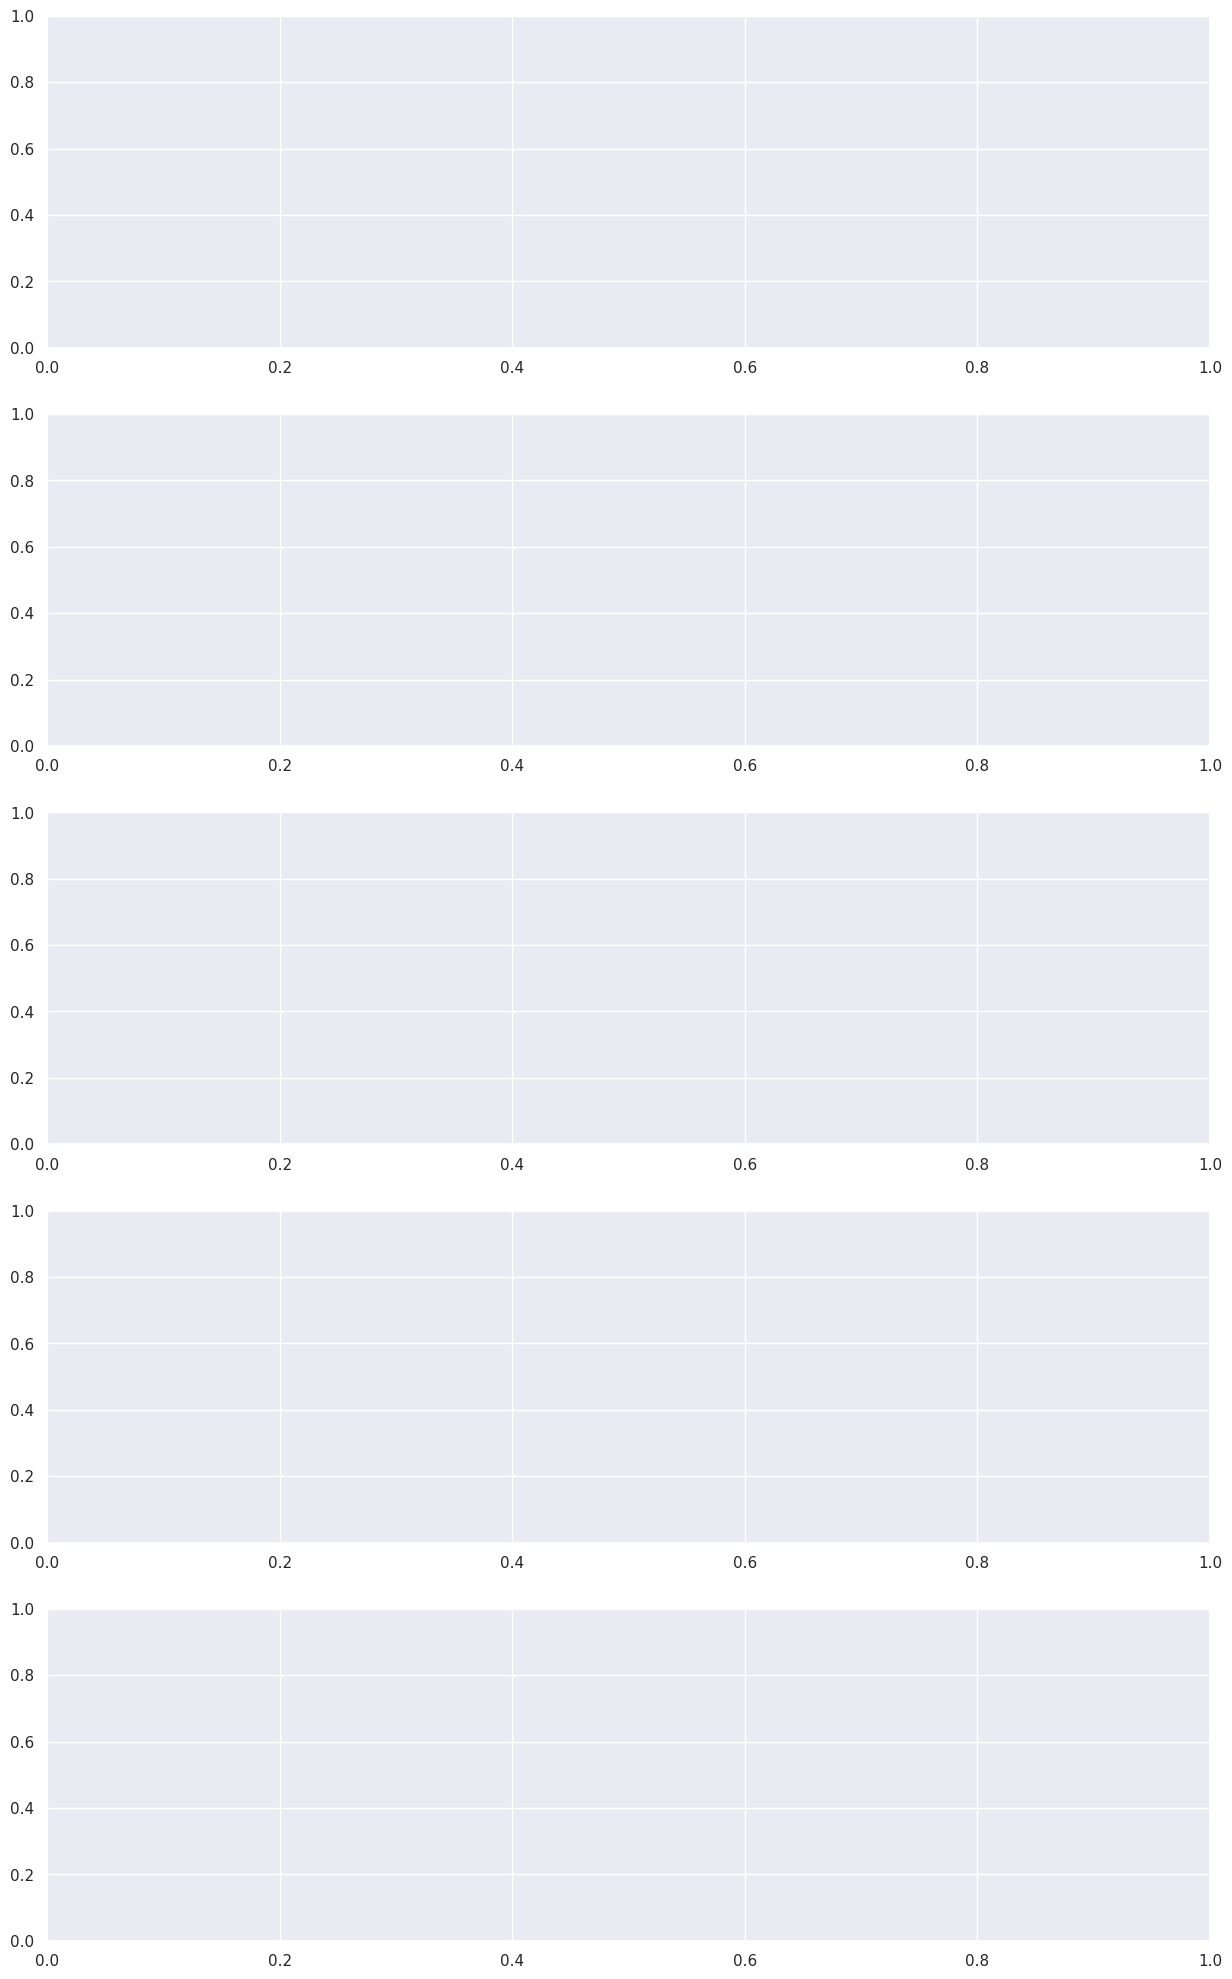

In [ ]:
from datetime import date
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

sns.lineplot(x=df.DATE, y=df.ISC.fillna(np.inf), ax=ax[0], color='dodgerblue')
ax[0].set_title('Feature: ISC', fontsize=14)
ax[0].set_ylabel(ylabel='ISC', fontsize=14)


sns.lineplot(x=df.DATE, y=df.bread_and_bread_stuff.fillna(np.inf), ax=ax[1], color='dodgerblue',label='Bastia Umbra')
ax[1].set_title('Feature: bread_and_bread_stuff', fontsize=14)
ax[1].set_ylabel(ylabel='bread_and_bread_stuff', fontsize=14)


sns.lineplot(x=df.DATE, y=df.milk_chease_eggs.fillna(np.inf), ax=ax[2], color='dodgerblue')
ax[2].set_title('Feature: milk_chease_eggs', fontsize=14)
ax[2].set_ylabel(ylabel='milk_chease_eggs', fontsize=14)


sns.lineplot(x=df.DATE, y=df.meat_and_meat_stuff.fillna(np.inf), ax=ax[3], color='dodgerblue')
ax[3].set_title('Feature: meat_and_meat_stuff', fontsize=14)
ax[3].set_ylabel(ylabel='meat_and_meat_stuff', fontsize=14)


sns.lineplot(x=df.DATE, y=df.vegetables.fillna(np.inf), ax=ax[4], color='dodgerblue')
ax[4].set_title('Target: vegetables', fontsize=14)
ax[4].set_ylabel(ylabel='vegetables', fontsize=14)


for i in range(5):
    ax[i].set_xlim([date(2013, 1, 1), date(2023, 10, 1)])

plt.show()

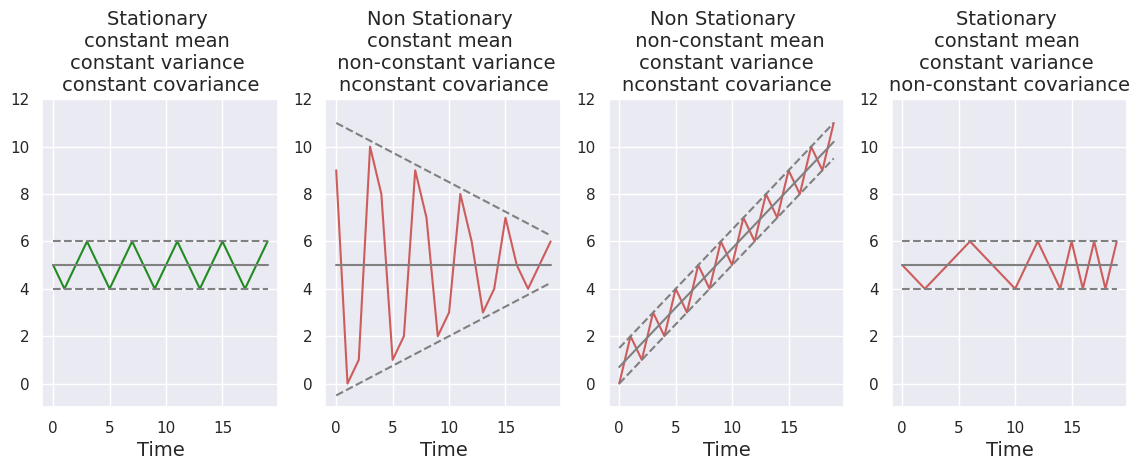

In [ ]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(14,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

AttributeError: ignored

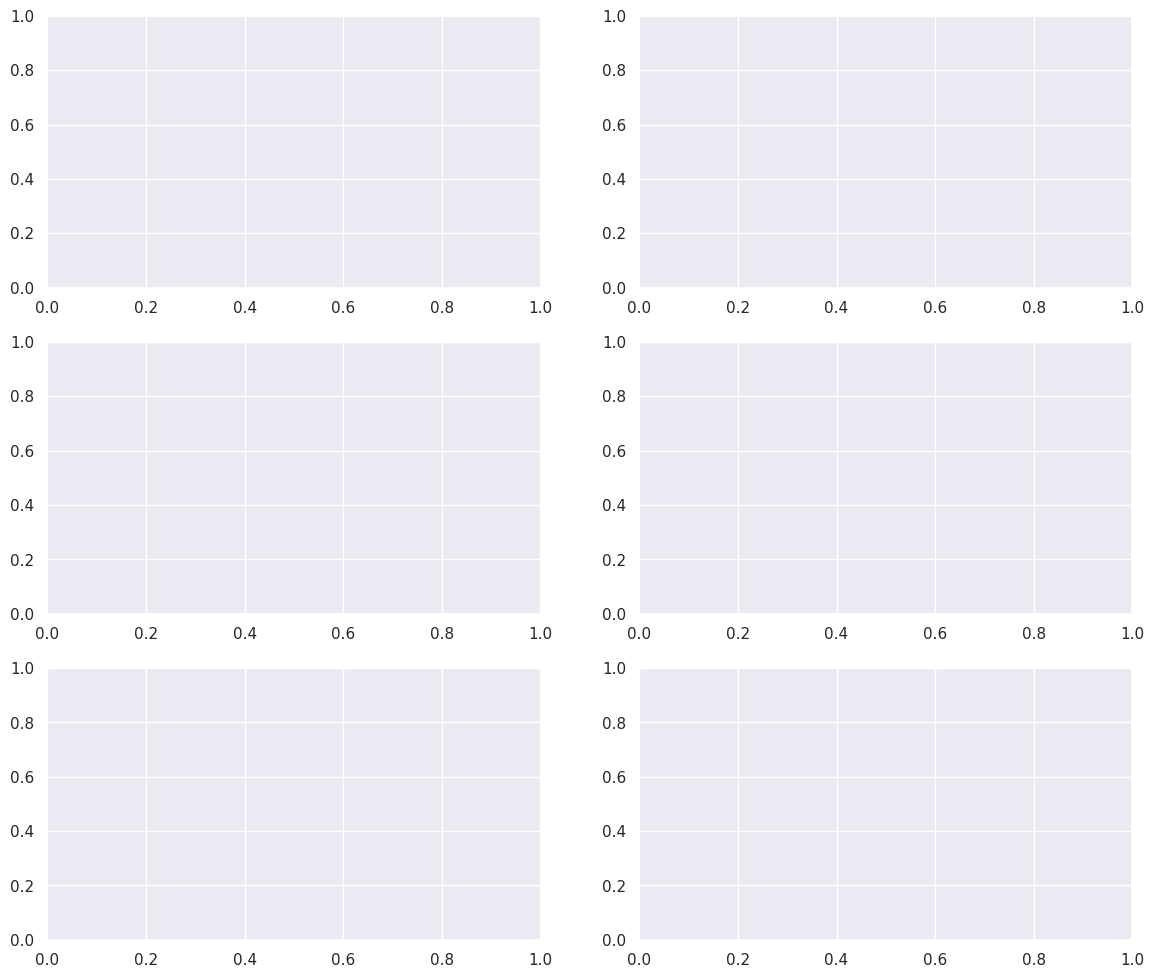

In [ ]:
rolling_window = 52
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

sns.lineplot(x=df.DATE, y=df.ISC, ax=ax[0, 0], color='indianred')
sns.lineplot(x=df.DATE, y=df.ISC.rolling(rolling_window).mean(), ax=ax[0, 0], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df.ISC.rolling(rolling_window).std(), ax=ax[0, 0], color='blue', label='rolling std')
ax[0, 0].set_title('ISC: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='ISC', fontsize=14)

sns.lineplot(x=df.DATE, y=df.bread_and_bread_stuff, ax=ax[1, 0], color='indianred')
sns.lineplot(x=df.DATE, y=df.bread_and_bread_stuff.rolling(rolling_window).mean(), ax=ax[1, 0], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df.bread_and_bread_stuff.rolling(rolling_window).std(), ax=ax[1, 0], color='blue', label='rolling std')
ax[1, 0].set_title('bread_and_bread_stuff: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 0].set_ylabel(ylabel='bread_and_bread_stuff', fontsize=14)

sns.lineplot(x=df.DATE, y=df.milk_chease_eggs, ax=ax[0, 1], color='indianred')
sns.lineplot(x=df.DATE, y=df.milk_chease_eggs.rolling(rolling_window).mean(), ax=ax[0, 1], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df.milk_chease_eggs.rolling(rolling_window).std(), ax=ax[0, 1], color='blue', label='rolling std')
ax[0, 1].set_title('milk_chease_eggs: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='milk_chease_eggs', fontsize=14)

sns.lineplot(x=df.DATE, y=df.meat_and_meat_stuff, ax=ax[1, 1], color='indianred')
sns.lineplot(x=df.DATE, y=df.meat_and_meat_stuff.rolling(rolling_window).mean(), ax=ax[1, 1], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df.meat_and_meat_stuff.rolling(rolling_window).std(), ax=ax[1, 1], color='blue', label='rolling std')
ax[1, 1].set_title('meat_and_meat_stuff: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='meat_and_meat_stuff', fontsize=14)

sns.lineplot(x=df.DATE, y=df.vegetables, ax=ax[2, 0], color='indianred')
sns.lineplot(x=df.DATE, y=df.vegetables.rolling(rolling_window).mean(), ax=ax[2, 0], color='black', label='rolling mean')
sns.lineplot(x=df.DATE, y=df.vegetables.rolling(rolling_window).std(), ax=ax[2, 0], color='blue', label='rolling std')
ax[2, 0].set_title('vegetables:Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[2, 0].set_ylabel(ylabel='vegetables', fontsize=14)


for i in range(3):
    ax[i,0].set_xlim([date(2013, 1, 1), date(2023, 10, 1)])
    ax[i,1].set_xlim([date(2013, 1, 1), date(2023, 10, 1)])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [ ]:
num_partitions = 2
partition_length = int(len(df) / num_partitions)

partition1_mean = df.head(partition_length).mean()
partition1_var = df.head(partition_length).var()
partition2_mean = df.tail(partition_length).mean()
partition2_var = df.tail(partition_length).var()

<ipython-input-19-dc7890b55595>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  partition1_mean = df.head(partition_length).mean()
<ipython-input-19-dc7890b55595>:5: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  partition1_var = df.head(partition_length).var()
<ipython-input-19-dc7890b55595>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of nu

In [ ]:
stationarity_test = pd.concat([partition1_mean, partition2_mean, partition1_var, partition2_var], axis=1)
stationarity_test.columns = ['Partition 1 Mean', 'Partition 2 Mean', 'Partition 1 Variance', 'Partition 2 Variance']

def highlight_greater(x):
    temp = x.copy()
    temp = temp.round(0).astype(int)
    m1 = (temp['Partition 1 Mean'] == temp['Partition 2 Mean'])
    m2 = (temp['Partition 1 Variance'] == temp['Partition 2 Variance'])
    m3 = (temp['Partition 1 Mean'] < temp['Partition 2 Mean']+3) & (temp['Partition 1 Mean'] > temp['Partition 2 Mean']-3)
    m4 = (temp['Partition 1 Variance'] < temp['Partition 2 Variance']+3) & (temp['Partition 1 Variance'] > temp['Partition 2 Variance']-3)

    df1 = pd.DataFrame('background-color: ', index=x.index, columns=x.columns)
    #rewrite values by boolean masks
    df1['Partition 1 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(~m1, 'background-color: {}'.format('salmon'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m3, 'background-color: {}'.format('gold'), df1['Partition 2 Mean'])
    df1['Partition 1 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Mean'])
    df1['Partition 2 Mean'] = np.where(m1, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Mean'])

    df1['Partition 1 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(~m2, 'background-color: {}'.format('salmon'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m4, 'background-color: {}'.format('gold'), df1['Partition 2 Variance'])
    df1['Partition 1 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 1 Variance'])
    df1['Partition 2 Variance'] = np.where(m2, 'background-color: {}'.format('mediumseagreen'), df1['Partition 2 Variance'])

    return df1


stationarity_test.style.apply(highlight_greater, axis=None).format("{:20,.0f}")

,Partition 1 Mean,Partition 2 Mean,Partition 1 Variance,Partition 2 Variance
All cargoes,117,116,225,354
Coal,115,118,162,599
Iron ore,116,119,193,624
Mineral and construction cargoes,109,119,9,9
Black metal,118,113,286,163
Oil and petroleum products,132,142,9,9
Chemical and mineral fertilizers,112,122,9,9
Drug,116,115,212,241
Chemical cargo,117,111,299,429
Cereal crops,115,116,260,265


<ipython-input-22-3356b12e425e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Coal.fillna(np.inf), ax=ax[0, 0], color='cyan')


AttributeError: ignored

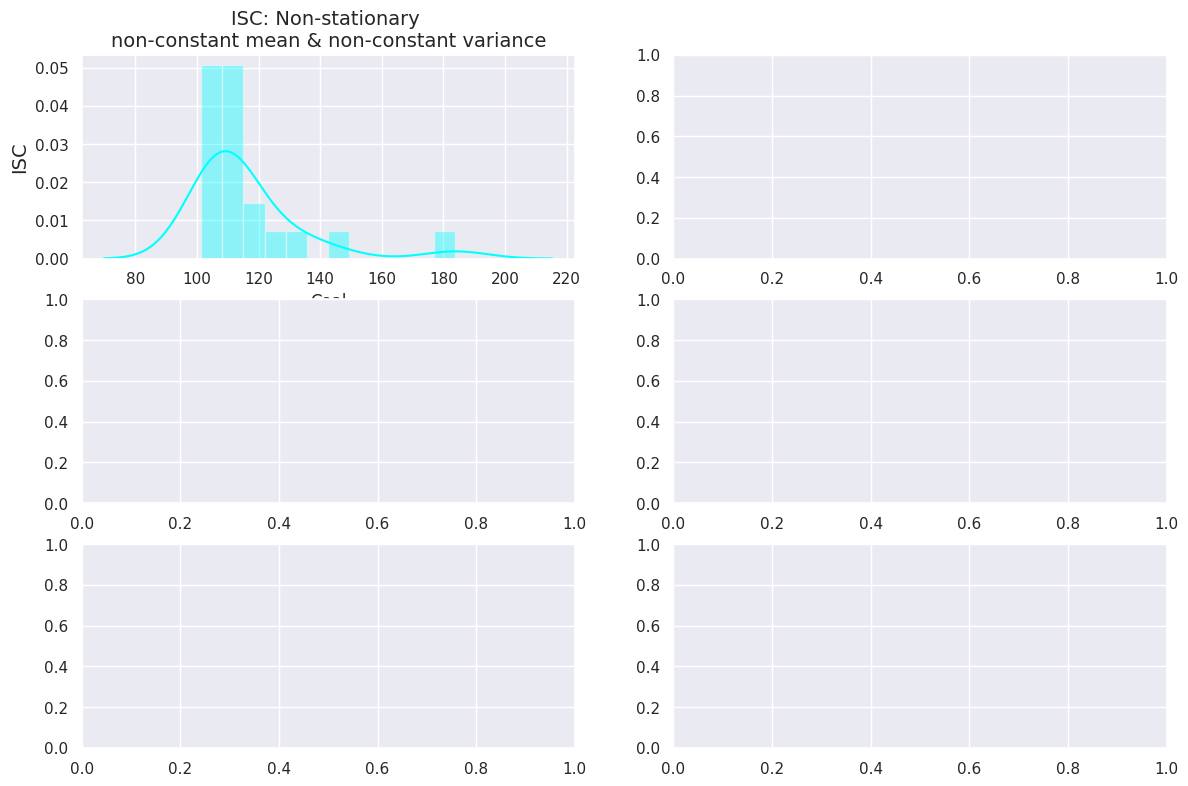

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 9))

sns.distplot(df.Coal.fillna(np.inf), ax=ax[0, 0], color='cyan')
ax[0, 0].set_title('ISC: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 0].set_ylabel(ylabel='ISC', fontsize=14)
sns.distplot(df.bread_and_bread_stuff.fillna(np.inf), ax=ax[1, 0], color='cyan')
ax[1, 0].set_title('bread_and_bread_stuff: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 0].set_ylabel(ylabel='bread_and_bread_stuff', fontsize=14)

sns.distplot(df.milk_chease_eggs.fillna(np.inf), ax=ax[0, 1], color='cyan')
ax[0, 1].set_title('milk_chease_eggs: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0, 1].set_ylabel(ylabel='milk_chease_eggs', fontsize=14)

sns.distplot(df.meat_and_meat_stuff.fillna(np.inf), ax=ax[1, 1], color='cyan')
ax[1, 1].set_title('meat_and_meat_stuff: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[1, 1].set_ylabel(ylabel='meat_and_meat_stuff', fontsize=14)

sns.distplot(df.vegetables.fillna(np.inf), ax=ax[2, 0], color='cyan')
ax[2, 0].set_title('vegetables:Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[2, 0].set_ylabel(ylabel='vegetables', fontsize=14)

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.ISC.values)
adf_stat = result[0]
p_val = result[1]
crit_val_1 = result[4]['1%']
crit_val_5 = result[4]['5%']
crit_val_10 = result[4]['10%']

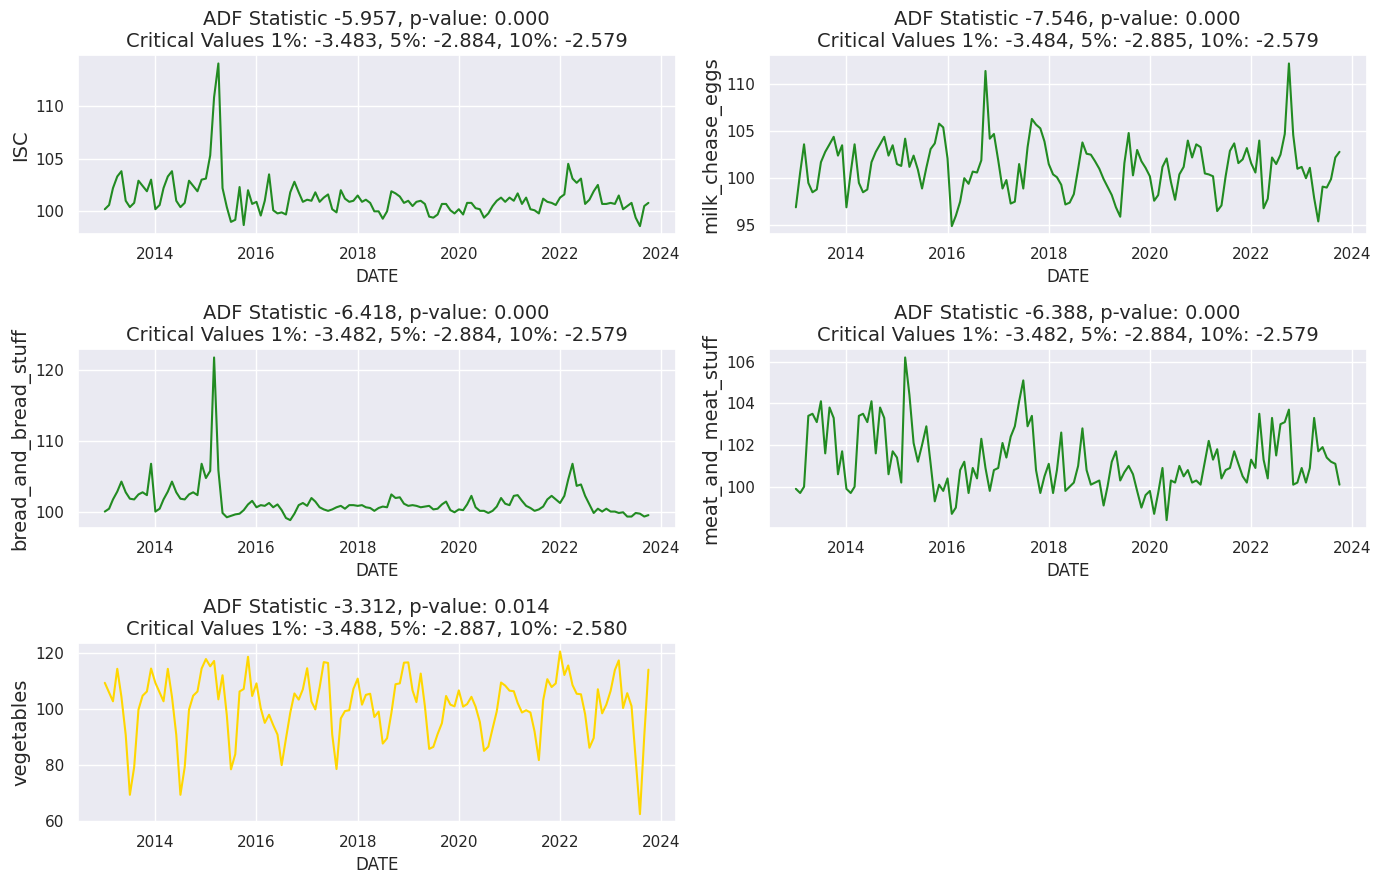

In [ ]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(14, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    sns.lineplot(x=df.DATE, y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(df.ISC.values, 'ISC', ax[0, 0])
visualize_adfuller_results(df.bread_and_bread_stuff.values, 'bread_and_bread_stuff', ax[1, 0])
visualize_adfuller_results(df.milk_chease_eggs.values, 'milk_chease_eggs', ax[0, 1])
visualize_adfuller_results(df.meat_and_meat_stuff.values, 'meat_and_meat_stuff', ax[1, 1])
visualize_adfuller_results(df.vegetables.values, 'vegetables', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_cols =  ['ISC', 'bread_and_bread_stuff',
                   'milk_chease_eggs',
                   'meat_and_meat_stuff', 'vegetables']

for col in decompose_cols:
    decomp = seasonal_decompose(df[col], period=52, model='additive', extrapolate_trend='freq')
    df[f"{col}_trend"] = decomp.trend
    df[f"{col}_seasonal"] = decomp.seasonal

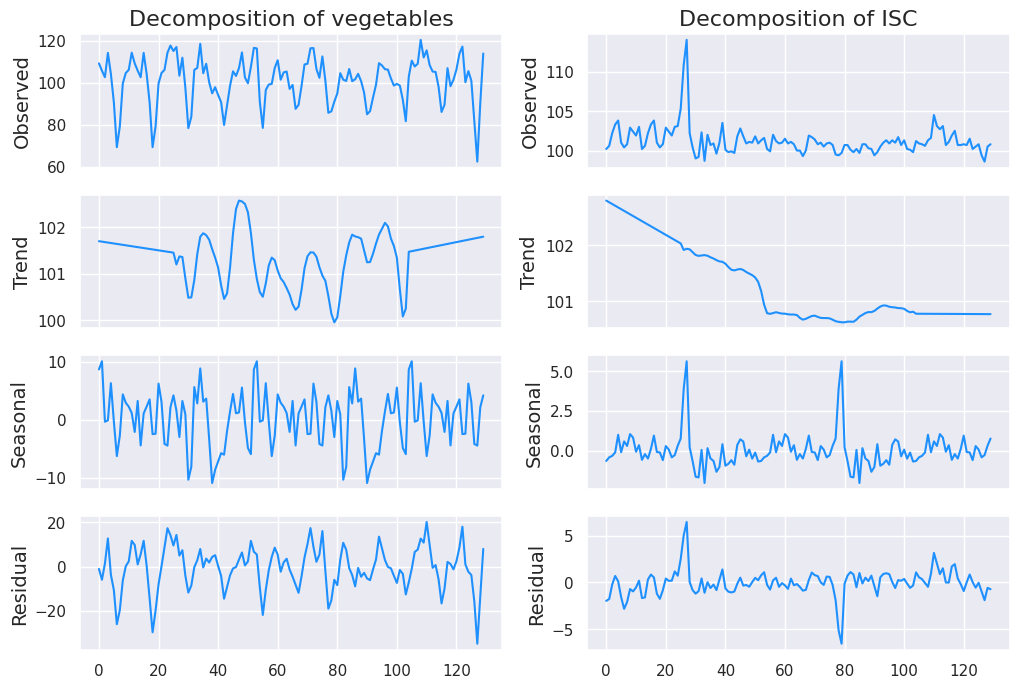

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(12, 8))

# Decomposition for Temperature
res = seasonal_decompose(df.vegetables, period=52, model='additive', extrapolate_trend='freq')
ax[0, 0].set_title('Decomposition of vegetables', fontsize=16)
res.observed.plot(ax=ax[0, 0], legend=False, color='dodgerblue')
ax[0, 0].set_ylabel('Observed', fontsize=14)


res.trend.plot(ax=ax[1, 0], legend=False, color='dodgerblue')
ax[1, 0].set_ylabel('Trend', fontsize=14)


res.seasonal.plot(ax=ax[2, 0], legend=False, color='dodgerblue')
ax[2, 0].set_ylabel('Seasonal', fontsize=14)


res.resid.plot(ax=ax[3, 0], legend=False, color='dodgerblue')
ax[3, 0].set_ylabel('Residual', fontsize=14)


# Decomposition for Depth_to_Groundwater
res = seasonal_decompose(df.ISC, period=52, model='additive', extrapolate_trend='freq')
ax[0, 1].set_title('Decomposition of ISC', fontsize=16)
res.observed.plot(ax=ax[0, 1], legend=False, color='dodgerblue')
ax[0, 1].set_ylabel('Observed', fontsize=14)

res.trend.plot(ax=ax[1, 1], legend=False, color='dodgerblue')
ax[1, 1].set_ylabel('Trend', fontsize=14)

res.seasonal.plot(ax=ax[2, 1], legend=False, color='dodgerblue')
ax[2, 1].set_ylabel('Seasonal', fontsize=14)

res.resid.plot(ax=ax[3, 1], legend=False, color='dodgerblue')
ax[3, 1].set_ylabel('Residual', fontsize=14)

plt.show()

In [ ]:
df[['ISC', 'ISC_trend', 'ISC_seasonal',
          'bread_and_bread_stuff', 'bread_and_bread_stuff_trend', 'bread_and_bread_stuff_seasonal',
          'milk_chease_eggs', 'milk_chease_eggs_trend', 'milk_chease_eggs_seasonal',
          'meat_and_meat_stuff', 'meat_and_meat_stuff_trend', 'meat_and_meat_stuff_seasonal',
          'vegetables', 'vegetables_trend', 'vegetables_seasonal']].head()\
.style.set_properties(subset=['ISC_trend', 'ISC_seasonal',
                              'bread_and_bread_stuff_trend', 'bread_and_bread_stuff_seasonal',
                              'milk_chease_eggs_trend', 'milk_chease_eggs_seasonal',
                              'meat_and_meat_stuff_trend', 'meat_and_meat_stuff_seasonal',
                              'vegetables_trend', 'vegetables_seasonal'
                             ], **{'background-color': 'dodgerblue'})

,ISC,ISC_trend,ISC_seasonal,bread_and_bread_stuff,bread_and_bread_stuff_trend,bread_and_bread_stuff_seasonal,milk_chease_eggs,milk_chease_eggs_trend,milk_chease_eggs_seasonal,meat_and_meat_stuff,meat_and_meat_stuff_trend,meat_and_meat_stuff_seasonal,vegetables,vegetables_trend,vegetables_seasonal
0,100.200000,102.809396,-0.640321,100.100000,102.876607,-1.184359,96.900000,102.188018,-1.949075,99.900000,102.357272,0.097210,109.300000,101.697645,8.687992
1,100.600000,102.778520,-0.414227,100.500000,102.846048,-0.691983,100.600000,102.169669,-0.078542,99.700000,102.334577,0.267784,105.800000,101.687788,10.091752
2,102.200000,102.747644,-0.319864,101.800000,102.815489,-0.005056,103.600000,102.151320,0.190388,100.000000,102.311882,0.525538,102.700000,101.677931,-0.314745
3,103.300000,102.716767,-0.105630,102.900000,102.784930,0.290845,99.500000,102.132971,0.697459,103.400000,102.289187,0.843549,114.300000,101.668075,-0.083101
4,103.800000,102.685891,1.000271,104.300000,102.754371,0.654695,98.500000,102.114622,0.821837,103.500000,102.266492,1.433033,104.300000,101.658218,6.319698


In [ ]:

weeks_in_month = 4
df['ISC_seasonal_shift_r_2M'] = df.ISC_seasonal.shift(-2*weeks_in_month)
df['ISC_seasonal_shift_r_1M'] = df.ISC_seasonal.shift(-1*weeks_in_month)
df['ISC_seasonal_shift_1M'] = df.ISC_seasonal.shift(1*weeks_in_month)
df['ISC_seasonal_shift_2M'] = df.ISC_seasonal.shift(2*weeks_in_month)
df['ISC_seasonal_shift_3M'] = df.ISC_seasonal.shift(3*weeks_in_month)

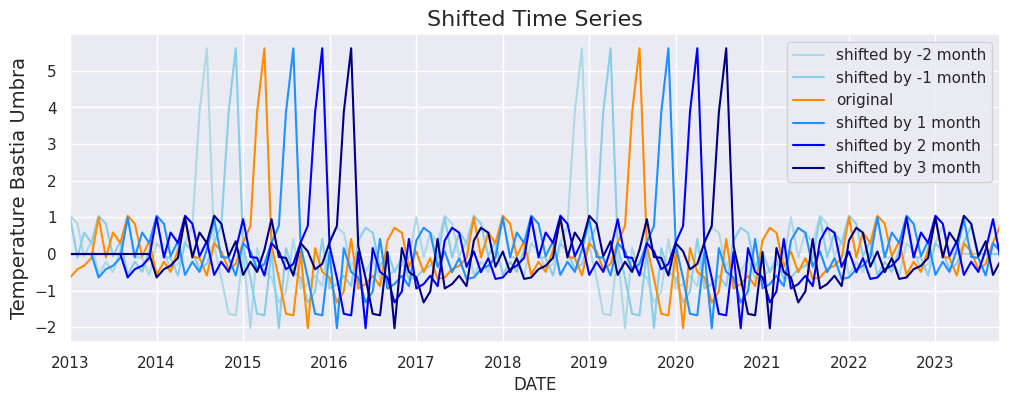

In [ ]:
df['vegetables_seasonal_shift_r_2M'] = df.vegetables_seasonal.shift(-2*weeks_in_month)
df['vegetables_seasonal_shift_r_1M'] = df.vegetables_seasonal.shift(-1*weeks_in_month)
df['vegetables_seasonal_shift_1M'] = df.vegetables_seasonal.shift(1*weeks_in_month)
df['vegetables_seasonal_shift_2M'] = df.vegetables_seasonal.shift(2*weeks_in_month)
df['vegetables_seasonal_shift_3M'] = df.vegetables_seasonal.shift(3*weeks_in_month)

df['milk_chease_eggs_seasonal_shift_r_2M'] = df.milk_chease_eggs_seasonal.shift(-2*weeks_in_month)
df['milk_chease_eggs_seasonal_shift_r_1M'] = df.milk_chease_eggs_seasonal.shift(-1*weeks_in_month)
df['milk_chease_eggs_seasonal_shift_1M'] = df.milk_chease_eggs_seasonal.shift(1*weeks_in_month)
df['milk_chease_eggs_seasonal_shift_2M'] = df.milk_chease_eggs_seasonal.shift(2*weeks_in_month)
df['milk_chease_eggs_seasonal_shift_3M'] = df.milk_chease_eggs_seasonal.shift(3*weeks_in_month)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12,4))
sns.lineplot(x=df.DATE, y=df.ISC_seasonal_shift_r_2M, label='shifted by -2 month', ax=ax, color='lightblue')
sns.lineplot(x=df.DATE, y=df.ISC_seasonal_shift_r_1M, label='shifted by -1 month', ax=ax, color='skyblue')

sns.lineplot(x=df.DATE, y=df.ISC_seasonal, label='original', ax=ax, color='darkorange')

sns.lineplot(x=df.DATE, y=df.ISC_seasonal_shift_1M, label='shifted by 1 month', ax=ax, color='dodgerblue')
sns.lineplot(x=df.DATE, y=df.ISC_seasonal_shift_2M, label='shifted by 2 month', ax=ax, color='blue')
sns.lineplot(x=df.DATE, y=df.ISC_seasonal_shift_3M, label='shifted by 3 month', ax=ax, color='navy')

ax.set_title('Shifted Time Series', fontsize=16)

ax.set_xlim([date(2013, 1, 1), date(2023, 10, 1)])
ax.set_ylabel(ylabel='Temperature Bastia Umbra', fontsize=14)

plt.show()
df = pd.DataFrame(df)

# Заміна значень NaN на нуль
df.fillna(0, inplace=True)
weeks_in_month = 4

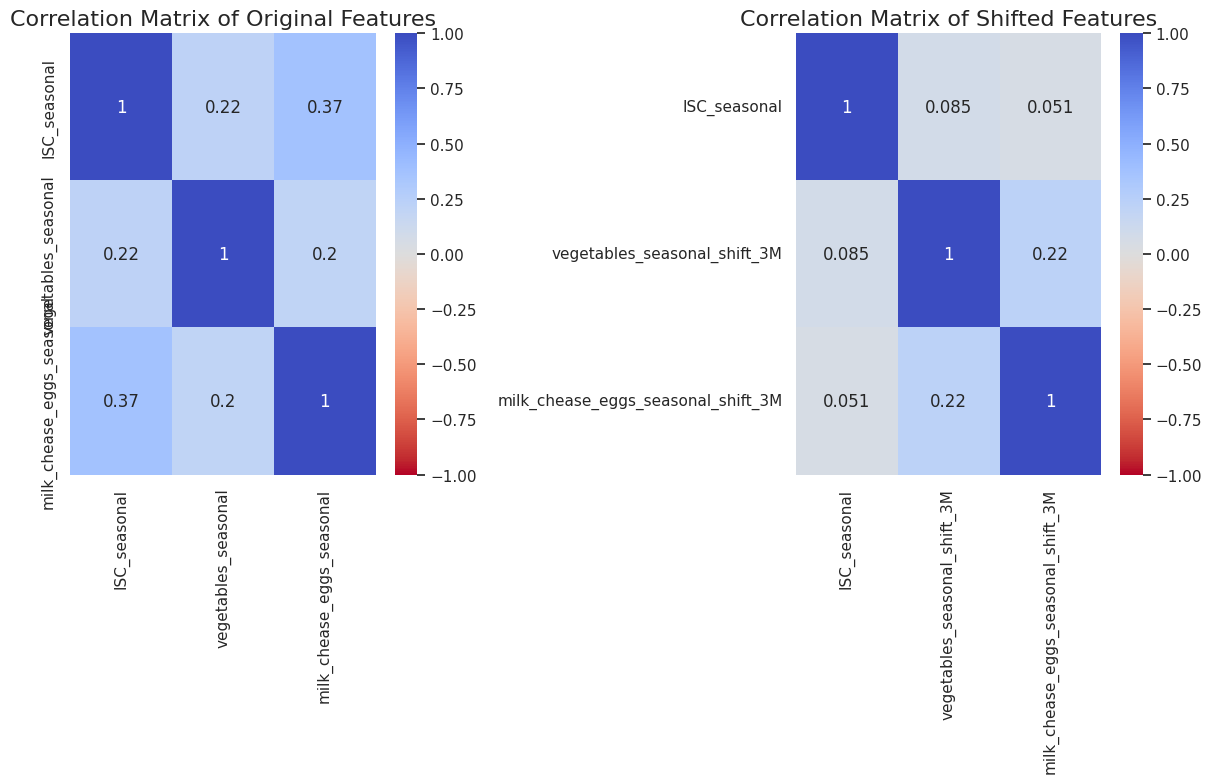

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

original_cols = ['ISC_seasonal',
                 'vegetables_seasonal',
                 'milk_chease_eggs_seasonal']

corrmat = df[original_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[0])
ax[0].set_title('Correlation Matrix of Original Features', fontsize=16)

shifted_cols = [ 'ISC_seasonal',
                'vegetables_seasonal_shift_3M',
                'milk_chease_eggs_seasonal_shift_3M']
corrmat = df[shifted_cols].corr()

sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax[1])
ax[1].set_title('Correlation Matrix of Shifted Features', fontsize=16)


plt.tight_layout()
plt.show()

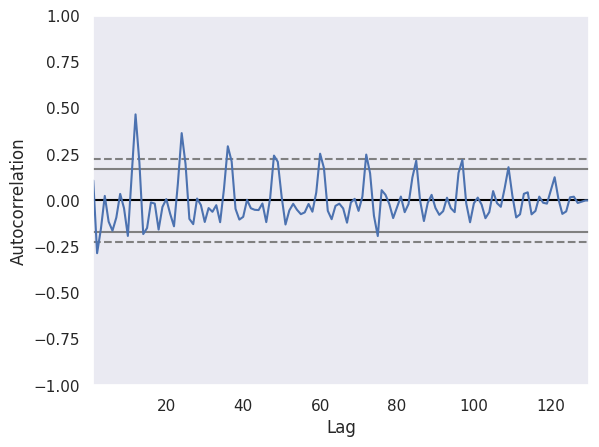

In [ ]:
from pandas.plotting import autocorrelation_plot
# First Order Differencing
ts_diff = np.diff(df.vegetables)
df['vegetables_diff_1'] = np.append([0], ts_diff)

# Second Order Differencing
ts_diff = np.diff(df.vegetables_diff_1)
df['vegetables_diff_2'] = np.append([0], ts_diff)
autocorrelation_plot(df.vegetables_diff_1)
plt.show()

AttributeError: ignored

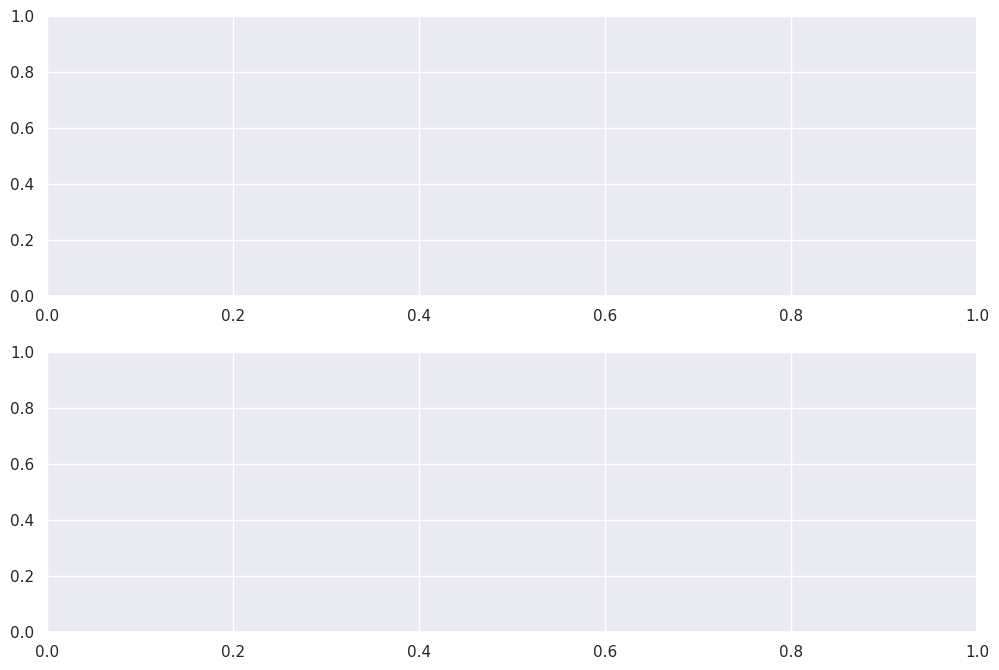

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

plot_acf(df.ISC_diff_1,lags=64, ax=ax[0])
plot_pacf(df.ISC_diff_1,lags=64, ax=ax[1])
plt.show()

ЛАБОРАТОРНА 9

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = df.Date
y = df.Coal

folds = TimeSeriesSplit(n_splits=N_SPLITS)

In [ ]:
display(df)

,Date,All cargoes,Coal,Iron ore,Mineral and construction cargoes,Black metal,Oil and petroleum products,Oil and dark petroleum products,Light petroleum products,Chemical and mineral fertilizers,Drug,Chemical cargo,Cereal crops,Forest cargoes,Cement
0,2003-01-01 00:00:00,111.300000,107.400000,110.900000,104.2,110.0,127.0,-,-,107.0,107.000000,107.000000,106.100000,106.900000,105.000000
1,2004-01-01 00:00:00,112.000000,110.600000,122.600000,105.2,110.8,128.0,-,-,108.0,122.500000,109.000000,109.600000,109.000000,107.500000
2,2005-01-01 00:00:00,139.300000,128.200000,127.200000,106.2,150.9,129.0,-,-,109.0,130.000000,148.900000,137.700000,148.900000,147.100000
3,2006-01-01 00:00:00,107.400000,103.000000,104.200000,107.2,109.1,130.0,-,-,110.0,100.900000,109.100000,112.000000,109.100000,109.100000
4,2007-01-01 00:00:00,109.300000,109.800000,109.900000,108.2,109.9,131.0,-,-,111.0,109.900000,109.800000,109.800000,109.900000,109.800000
5,2008-01-01 00:00:00,149.000000,143.100000,148.900000,109.2,148.5,132.0,-,-,112.0,149.900000,149.400000,151.100000,149.400000,156.200000
6,2009-01-01 00:00:00,113.500000,120.300000,105.200000,110.2,111.1,133.0,-,-,113.0,111.400000,116.500000,112.400000,119.200000,116.500000
7,2010-01-01 00:00:00,102.200000,101.300000,104.700000,111.2,104.8,134.0,-,-,114.0,105.500000,100.200000,99.000000,100.900000,100.200000
8,2011-01-01 00:00:00,113.300000,112.900000,114.600000,112.2,114.7,135.0,113.1,113.0,115.0,114.400000,113.000000,108.400000,113.100000,112.900000
9,2012-01-01 00:00:00,109.800000,110.000000,110.000000,113.2,110.0,136.0,109.9,110.0,116.0,109.900000,109.900000,106.600000,109.900000,110.000000


In [3]:
df['quarter'] = pd.DatetimeIndex(df['Date']).quarter
df['quarter_idx'] = (df.quarter != df.quarter.shift(1)).cumsum()

target = 'Coal'
features = [feature for feature in df.columns if feature != target]

N_SPLITS = 43
X = df[df.quarter_idx < N_SPLITS][features]
y = df[df.quarter_idx < N_SPLITS][target]

X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

NameError: ignored

In [2]:
folds = np.linspace(0, N_SPLITS-3, num=N_SPLITS-2)

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='darkorange', label='test')

sns.lineplot(x=df.Date, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2003, 1, 1), date(2022, 1, 1)])
ax[1].set_xlim([date(2003, 1, 1), date(2022, 1, 1)])
ax[1].set_ylim([0, N_SPLITS+1])
#ax[0].set_ylim([-28, -23])

plt.show()
print(df.quarter_idx)

NameError: ignored

In [ ]:
def plot_approach_evaluation(y_pred, score_mae, score_rsme, approach_name):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    f.suptitle(approach_name, fontsize=16)
    sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='Training', linewidth=2)
    sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='gold', label='Ground Truth', linewidth=2) #navajowhite
    sns.lineplot(x=X_test.Date, y=y_pred, ax=ax[0], color='darkorange', label='Predicted', linewidth=2)
    ax[0].set_xlim([date(2013, 1, 1), date(2023, 10, 1)])

    ax[0].set_title(f'Prediction \n MAE: {mean_absolute_error(y_test, y_pred):.2f}, RSME: {math.sqrt(mean_squared_error(y_valid, y_valid_pred)):.2f}', fontsize=14)
    ax[0].set_xlabel(xlabel='Date', fontsize=14)
    ax[0].set_ylabel(ylabel='Vegetables', fontsize=14)

    sns.lineplot(x=folds, y=score_mae,  color='gold', label='MAE', ax=ax[1])#marker='o',
    sns.lineplot(x=folds, y=score_rsme, color='indianred', label='RSME', ax=ax[1])
    ax[1].set_title('Loss', fontsize=14)
    ax[1].set_xlabel(xlabel='Fold', fontsize=14)
    ax[1].set_ylabel(ylabel='Loss', fontsize=14)
    plt.show()

Експоненціальне згладжування

ConversionError: ignored

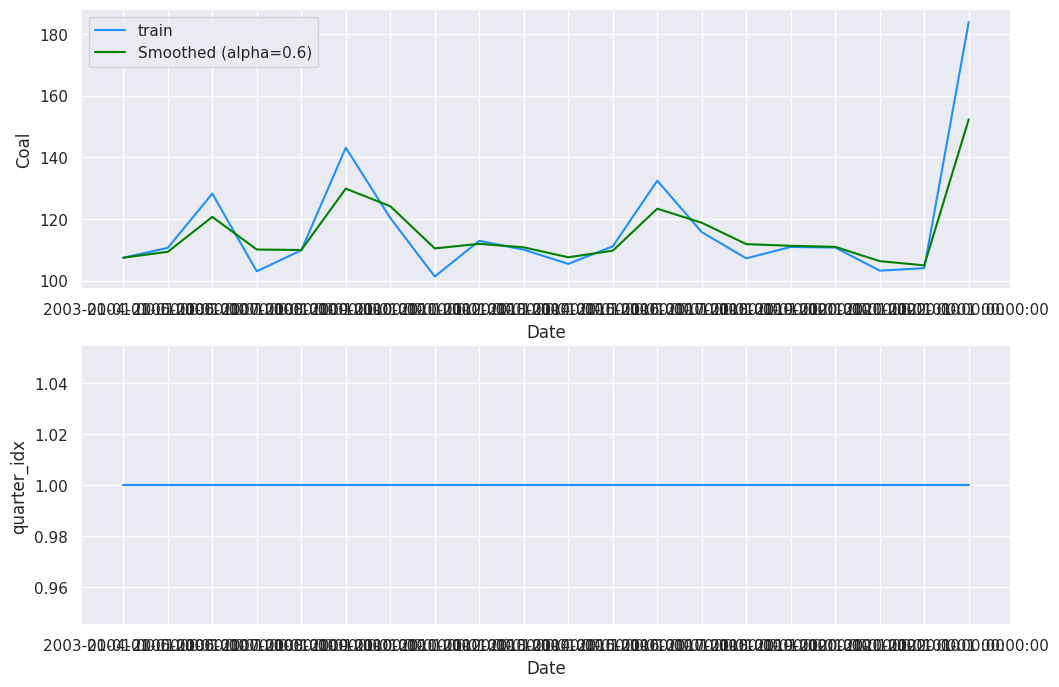

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

# Exponential smoothing
def exponential_smoothing(series, alpha):
    result = [series[0]]  # Initialize the result with the first data point
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

# Choose your smoothing parameter alpha (0 < alpha < 1)
alpha = 0.6

# Apply exponential smoothing to your time series
smoothed = exponential_smoothing(y, alpha)

# Plot the original and smoothed time series
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
sns.lineplot(x=X.Date, y=y, ax=ax[0], color='dodgerblue', label='train')
sns.lineplot(x=X_test.Date, y=y_test, ax=ax[0], color='darkorange', label='test')
sns.lineplot(x=X.Date, y=smoothed, ax=ax[0], color='green', label=f'Smoothed (alpha={alpha})')

sns.lineplot(x=df.Date, y=df.quarter_idx, ax=ax[1], color='dodgerblue')
ax[0].set_xlim([date(2013, 1, 1), date(2023, 10, 1)])
ax[1].set_xlim([date(2013, 1, 1), date(2023, 10, 1)])
ax[1].set_ylim([0, N_SPLITS+1])
# ax[0].set_ylim([-28, -23])

plt.show()

In [ ]:
score_mae = []
score_rsme = []
N_SPLITS = 43
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))

    # Prediction: Naive approach
    y_valid_pred = y_valid_pred * y_train.iloc[-1]

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.ones(len(X_test))) * y.iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Naive Approach')

ValueError: ignored

In [ ]:


# Виведення DataFrame з заміненими значеннями NaN
display(df)

,DATE,ISC,bread_and_bread_stuff,meat_and_meat_stuff,milk_chease_eggs,vegetables,quarter,quarter_idx
0,2013-01-01,100.2,100.1,99.9,96.9,109.3,1,1
1,2013-02-01,100.6,100.5,99.7,100.6,105.8,1,1
2,2013-03-01,102.2,101.8,100.0,103.6,102.7,1,1
3,2013-04-01,103.3,102.9,103.4,99.5,114.3,2,2
4,2013-05-01,103.8,104.3,103.5,98.5,104.3,2,2
...,...,...,...,...,...,...,...,...
125,2023-06-01,100.8,99.4,101.9,99.1,101.0,2,42
126,2023-07-01,99.4,99.9,101.4,99.0,81.8,3,43
127,2023-08-01,98.6,99.8,101.2,99.9,62.4,3,43
128,2023-09-01,100.5,99.4,101.1,102.2,90.3,3,43


In [ ]:
score_mae = []
score_rsme = []
for fold, valid_quarter_id in enumerate(range(2, N_SPLITS)):
    # Get indices for this fold
    train_index = df[df.quarter_idx < valid_quarter_id].index
    valid_index = df[df.quarter_idx == valid_quarter_id].index

    # Prepare training and validation data for this fold
    #X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    # Initialize y_valid_pred
    y_valid_pred = pd.Series(np.ones(len(y_valid)))

    # Prediction: Naive approach
    for i in range(len(y_valid_pred)):
        y_valid_pred.iloc[i] = y_train.append(y_valid_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

    # Calcuate metrics
    score_mae.append(mean_absolute_error(y_valid, y_valid_pred))
    score_rsme.append(math.sqrt(mean_squared_error(y_valid, y_valid_pred)))

y_pred = pd.Series(np.zeros(len(X_test)))

for i in range(len(y_pred)):
    y_pred.iloc[i] = y.append(y_pred.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]

plot_approach_evaluation(y_pred, score_mae, score_rsme, 'Moving Average (Window = 4 Weeks)')

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Define your target and features as you did in your code
target = 'Coal'
features = [feature for feature in df.columns if feature != target]

# Create the training and test sets
N_SPLITS = 43
X_train = df[df.quarter_idx < N_SPLITS][features]
y_train = df[df.quarter_idx < N_SPLITS][target]
X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

# Fit an ARIMA model
p = 0  # AR order
d = 1  # Integration order
q = 0  # MA order

model = sm.tsa.ARIMA(y_train, order=(p, d, q))
results = model.fit()

# Make predictions
y_pred = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)


# Plot the original and predicted time series
plt.figure(figsize=(12, 8))
plt.plot(X_train.Date, y_train, color='dodgerblue', label='Train')
plt.plot(X_test.Date, y_test, color='darkorange', label='Test')
plt.plot(X_test.Date, y_pred, color='green', label='Predicted')

plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Depth_to_Groundwater')
plt.legend()
plt.show()

ValueError: ignored

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


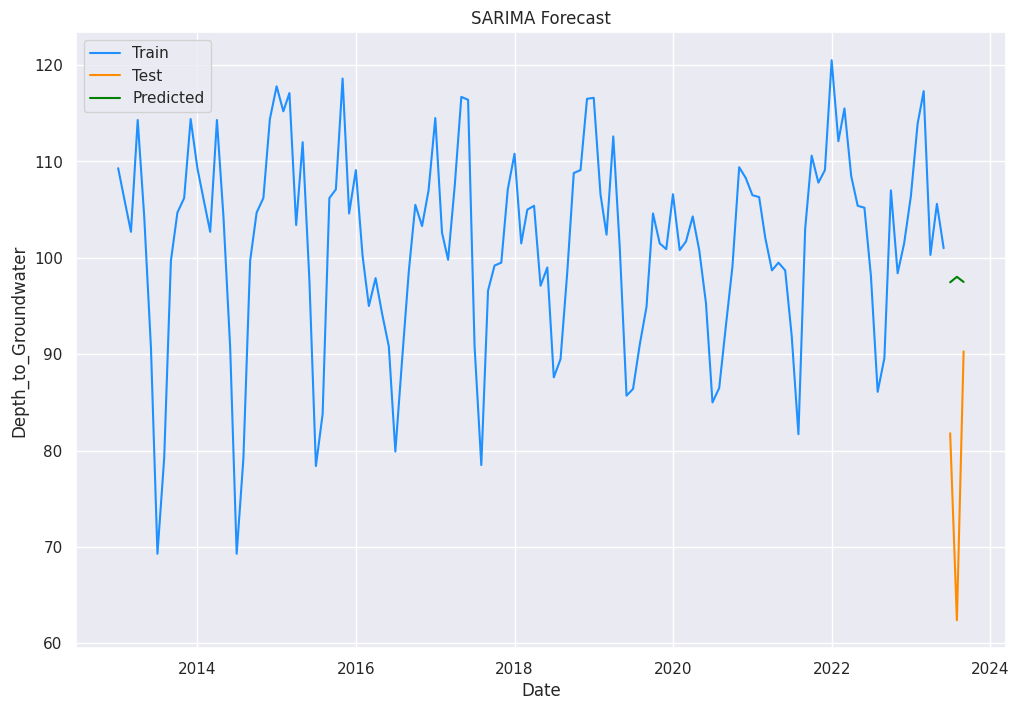

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Define your target and features as you did in your code
target = 'vegetables'
features = [feature for feature in df.columns if feature != target]

# Create the training and test sets
N_SPLITS = 43
X_train = df[df.quarter_idx < N_SPLITS][features]
y_train = df[df.quarter_idx < N_SPLITS][target]
X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

# Define SARIMA orders
p = 0  # AR order
d = 1  # Integration order
q = 1  # MA order
P = 1  # Seasonal AR order
D = 2  # Seasonal Integration order
Q = 1  # Seasonal MA order
s = 30  # Seasonal period

# Fit a SARIMA model
model = sm.tsa.SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Make predictions
y_pred = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Plot the original and predicted time series
plt.figure(figsize=(12, 8))
plt.plot(X_train.DATE, y_train, color='dodgerblue', label='Train')
plt.plot(X_test.DATE, y_test, color='darkorange', label='Test')
plt.plot(X_test.DATE, y_pred, color='green', label='Predicted')

plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Depth_to_Groundwater')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Define your target and features as you did in your code
target = 'vegetables'
features = [feature for feature in df.columns if feature != target]

# Create the training and test sets
N_SPLITS = 43
X_train = df[df.quarter_idx < N_SPLITS][features]
y_train = df[df.quarter_idx < N_SPLITS][target]
X_test = df[df.quarter_idx == N_SPLITS][features].reset_index(drop=True)
y_test = df[df.quarter_idx == N_SPLITS][target].reset_index(drop=True)

# Initialize evaluation scores
score_mae = []
score_rmse = []

# Naive Approach
y_pred_naive = pd.Series(np.ones(len(X_test)) * y_train.iloc[-1])
score_mae.append(mean_absolute_error(y_test, y_pred_naive))
score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred_naive)))

# Moving Average (Window = 4 Weeks)
y_pred_ma = pd.Series(np.zeros(len(X_test)))
for i in range(len(y_pred_ma)):
    y_pred_ma.iloc[i] = y_train.append(y_pred_ma.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
score_mae.append(mean_absolute_error(y_test, y_pred_ma))
score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred_ma)))

# Exponential Smoothing
def exponential_smoothing(series, alpha):
    result = [series[0]]  # Initialize the result with the first data point
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

alpha = 1
smoothed = exponential_smoothing(y_train, alpha)
y_pred_exp_smooth = pd.Series(smoothed[-1] * np.ones(len(X_test)))
score_mae.append(mean_absolute_error(y_test, y_pred_exp_smooth))
score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred_exp_smooth)))

model_arima = sm.tsa.ARIMA(y_train, order=(p, d, q))
results_arima = model_arima.fit()
y_pred_arima = results_arima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False, typ='levels')
score_mae.append(mean_absolute_error(y_test, y_pred_arima))
score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred_arima)))

model_sarima = sm.tsa.SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
results_sarima = model_sarima.fit()
y_pred_sarima = results_sarima.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)
score_mae.append(mean_absolute_error(y_test, y_pred_sarima))
score_rmse.append(math.sqrt(mean_squared_error(y_test, y_pred_sarima)))


<ipython-input-75-6d453e0f44c8>:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred_ma.iloc[i] = y_train.append(y_pred_ma.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
<ipython-input-75-6d453e0f44c8>:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred_ma.iloc[i] = y_train.append(y_pred_ma.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
<ipython-input-75-6d453e0f44c8>:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_pred_ma.iloc[i] = y_train.append(y_pred_ma.iloc[:(i)]).reset_index(drop=True).rolling(4).mean().iloc[-1]
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unkn

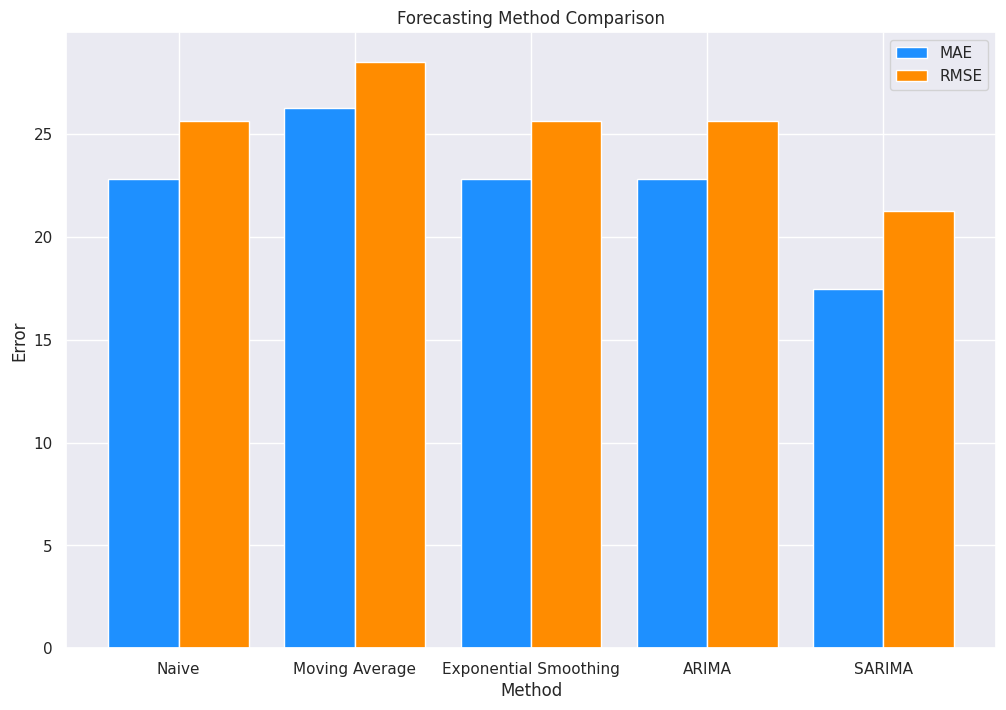

In [ ]:
methods = ['Naive', 'Moving Average', 'Exponential Smoothing', 'ARIMA', 'SARIMA']

bar_width = 0.4
index = np.arange(len(methods))

plt.figure(figsize=(12, 8))
plt.bar(index, score_mae, bar_width, color='dodgerblue', label='MAE')
plt.bar(index + bar_width, score_rmse, bar_width, color='darkorange', label='RMSE')
plt.title('Forecasting Method Comparison')
plt.xlabel('Method')
plt.ylabel('Error')
plt.xticks(index + bar_width / 2, methods)
plt.legend()
plt.show()

In [ ]:
# Create a DataFrame to store the metrics
metrics_df = pd.DataFrame({'Method': methods, 'MAE': score_mae, 'RMSE': score_rmse})

# Display the metrics in a table
print(metrics_df)

                  Method        MAE       RMSE
0                  Naive  22.833333  25.645597
1         Moving Average  26.253125  28.534681
2  Exponential Smoothing  22.833333  25.645597
3                  ARIMA  22.833333  25.645597
4                 SARIMA  17.489403  21.259283
